### If running within a Docker, no action is needed. If not, add the installation path (e.g. 'path_to_fwi2d_directory/local/bin') to the environment variables 'PATH' and 'PYTHONPATH' before running the notebook.

In [1]:
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seppy

sep = seppy.sep()

# Create a directory to store data
!mkdir -p data
datapath = "./data/"

### Generate source time function (Ricker wavelet)

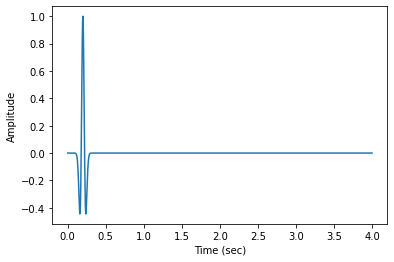

In [2]:
# source time function parameters
nt=1001 # number of time samples
dt=0.004 # sampling rate (sec)
ot=0.0 # origin time
f0=10. # peak frequency (Hz)
shift=50 # shift wavelet (number of samples)

# source wavelet
w=np.zeros(nt)
pi = math.pi
tshift=shift*dt
sig=math.sqrt(2)/(2*f0*pi)
t=np.linspace(0,(nt-1)*dt,nt)
w=(1.0 - ((t-tshift)/sig)**2)*np.exp( -0.5*((t-tshift)/sig)**2)

plt.plot(np.linspace(ot,(nt-1)*dt,nt),w)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.show()

### Generate elastic isotropic models

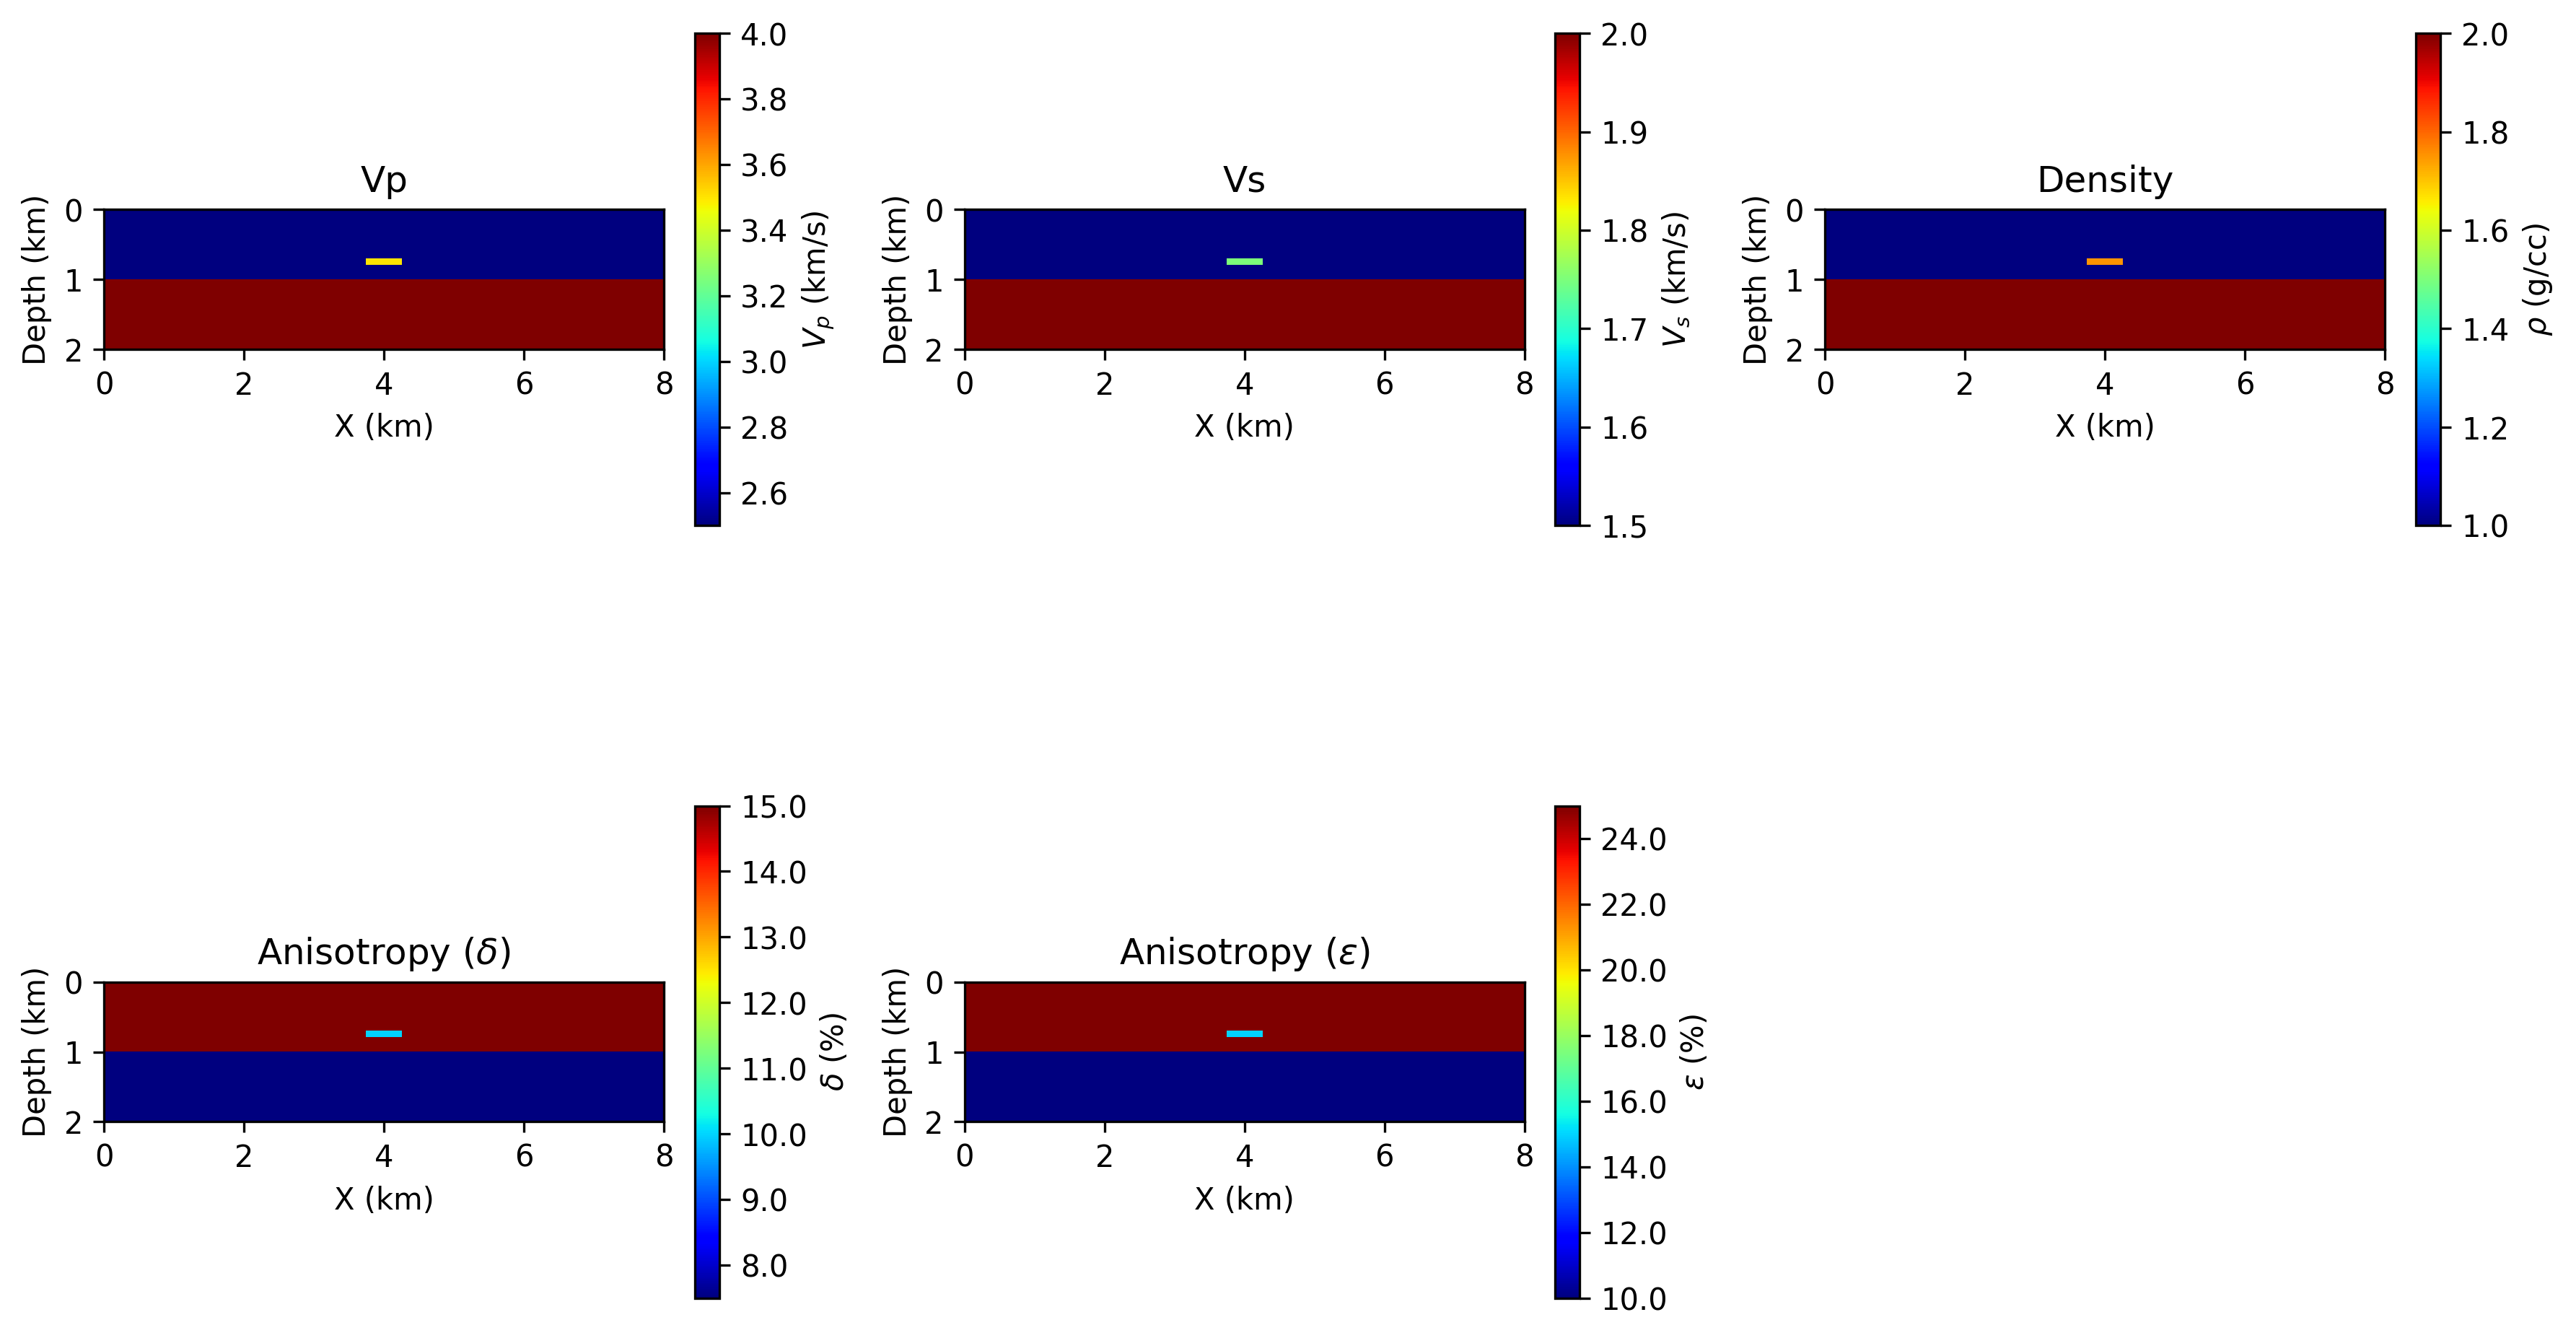

In [3]:
nz=201
nx=801
dz=0.01
dx=0.01
oz=0.0
ox=0.0
extent = [ox,ox+(nx-1)*dx,oz+(nz-1)*dz,oz]

# two-layers model (starting model)
model0=np.zeros((5,nx,nz))
model0[0,:,:100] = 2.5 # Vp in km/s
model0[0,:,100:] = 4.0
model0[1,:,:100] = 1.5 # Vs in km/s
model0[1,:,100:] = 2.0
model0[2,:,:100] = 1.0 # Density in g/cc
model0[2,:,100:] = 2.0 # Density in g/cc
model0[3,:,0:100]=0.15 # Delta in % (Thomsen parameters)
model0[3,:,100:]=0.075# Delta in % (Thomsen parameters)
model0[4,:,0:100]=0.25 # Epsilon in % (Thomsen parameters)
model0[4,:,100:]=0.1

# true model = starting model + intrusion
model = np.copy(model0)
model[0,375:426,70:80] = 3.5
model[1,375:426,70:80] = 1.75
model[2,375:426,70:80] = 1.75
model[3,375:426,70:80] = 0.1
model[4,375:426,70:80] = 0.15



plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,3,1)
plt.imshow(np.transpose(model[0,:,:]),interpolation='none',aspect="equal",extent=extent,cmap='jet',vmin=2.5,vmax=4.0)
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f',label=r'$V_p$ (km/s)')
plt.title("Vp")

plt.subplot(2,3,2)
plt.imshow(np.transpose(model[1,:,:]),interpolation='none',aspect="equal",extent=extent,cmap='jet',vmin=1.5,vmax=2.0)
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f',label=r'$V_s$ (km/s)')
plt.title("Vs")

plt.subplot(2,3,3)
plt.imshow(np.transpose(model[2,:,:]),interpolation='none',aspect="equal",extent=extent,cmap='jet',vmin=1.0,vmax=2.0)
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f',label=r'$\rho$ (g/cc)')
plt.title("Density")

plt.subplot(2,3,4)
plt.imshow(100 * np.transpose(model[3,:,:]), interpolation='none', aspect="equal", extent=extent, cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$\delta$ (%)')
plt.title(r'Anisotropy ($\delta$)')

plt.subplot(2,3,5)
plt.imshow(100 * np.transpose(model[4,:,:]), interpolation='none', aspect="equal", extent=extent, cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$\epsilon$ (%)')
plt.title(r'Anisotropy ($\epsilon$)')

plt.tight_layout()

plt.tight_layout()

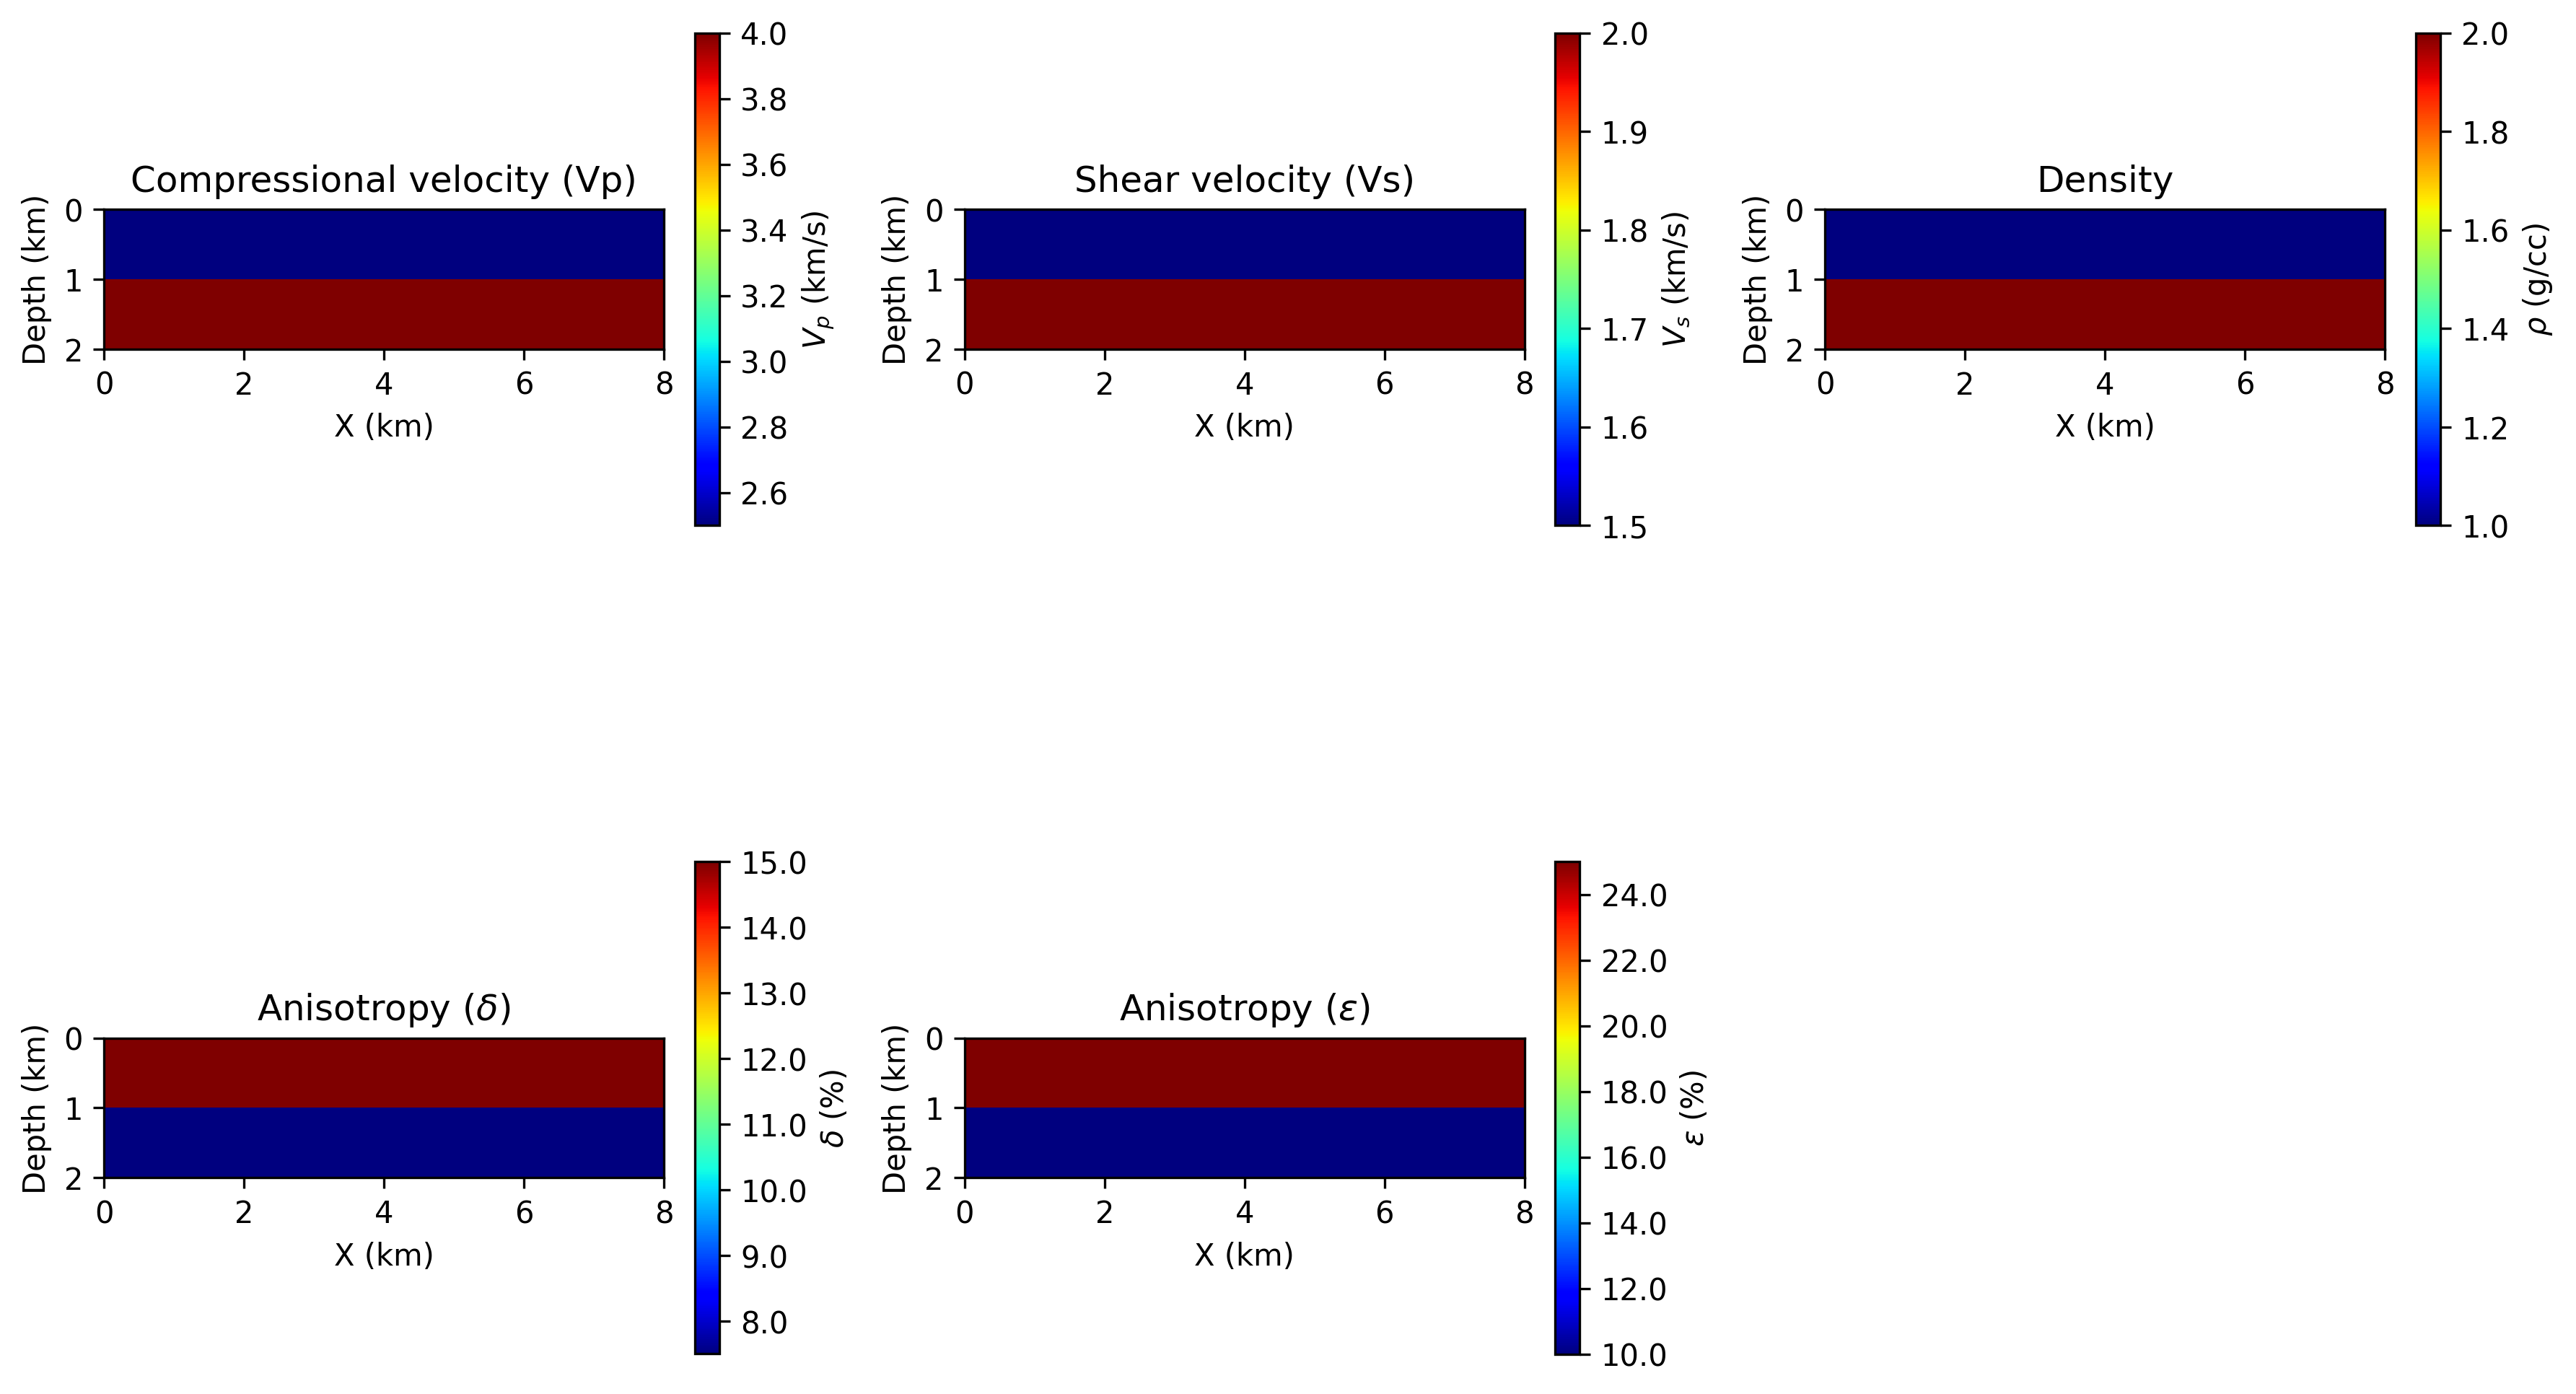

In [4]:
# 绘制 Vp
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,3,1)
plt.imshow(np.transpose(model0[0,:,:]), interpolation='none', aspect="equal", extent=extent, cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$V_p$ (km/s)')
plt.title("Compressional velocity (Vp)")

# 绘制 Vs
plt.subplot(2,3,2)
plt.imshow(np.transpose(model0[1,:,:]), interpolation='none', aspect="equal", extent=extent, cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$V_s$ (km/s)')
plt.title("Shear velocity (Vs)")

# 绘制密度
plt.subplot(2,3,3)
plt.imshow(np.transpose(model0[2,:,:]), interpolation='none', aspect="equal", extent=extent, cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$\rho$ (g/cc)')
plt.title("Density")

# 绘制 Delta
plt.subplot(2,3,4)
plt.imshow(100 * np.transpose(model0[3,:,:]), interpolation='none', aspect="equal", extent=extent, cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$\delta$ (%)')
plt.title(r'Anisotropy ($\delta$)')

# 绘制 Epsilon
plt.subplot(2,3,5)
plt.imshow(100 * np.transpose(model0[4,:,:]), interpolation='none', aspect="equal", extent=extent, cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$\epsilon$ (%)')
plt.title(r'Anisotropy ($\epsilon$)')

plt.tight_layout()

In [5]:
# save wavelet and models to SEPlib
sep.write_file(datapath+"wavelet.H", w, ds=np.array([dt]), os=np.array([ot]), dpath=datapath)
sep.write_file(datapath+"model0.H", np.transpose(model0), ds=np.array([dz,dx,1]), os=np.array([oz,ox,0]), dpath=datapath)
sep.write_file(datapath+"model.H", np.transpose(model), ds=np.array([dz,dx,1]), os=np.array([oz,ox,0]), dpath=datapath)

### Generate true data and run FWI

In [6]:
# generate true data
!WE_MODELING.x source=./data/wavelet.H model=./data/model.H output=./data/data.H datapath=${PWD}/data/ ioutput=./data/ \
verbose=0 fmax=30 dt=-1 mt=0 fangle=1.5708 seismotype=1 \
ns=10 sx0=2 sz0=0.1 sxinc=0.4 nr=401 rx0=2 rz0=0.1 rxinc=0.01 \
bc_top=2 bc_bottom=2 bc_left=2 bc_right=2 taper_top=50 taper_bottom=50 taper_left=50 taper_right=50 taper_strength=0.08

In [7]:
# load, and plot
ns=10 # number of shots
ncomp=2 # number of components
axes_data, data = sep.read_file(datapath+"data.H")
data = data.reshape([axes_data.n[0],int(axes_data.n[1]/(ns)),ns,ncomp],order='F').T

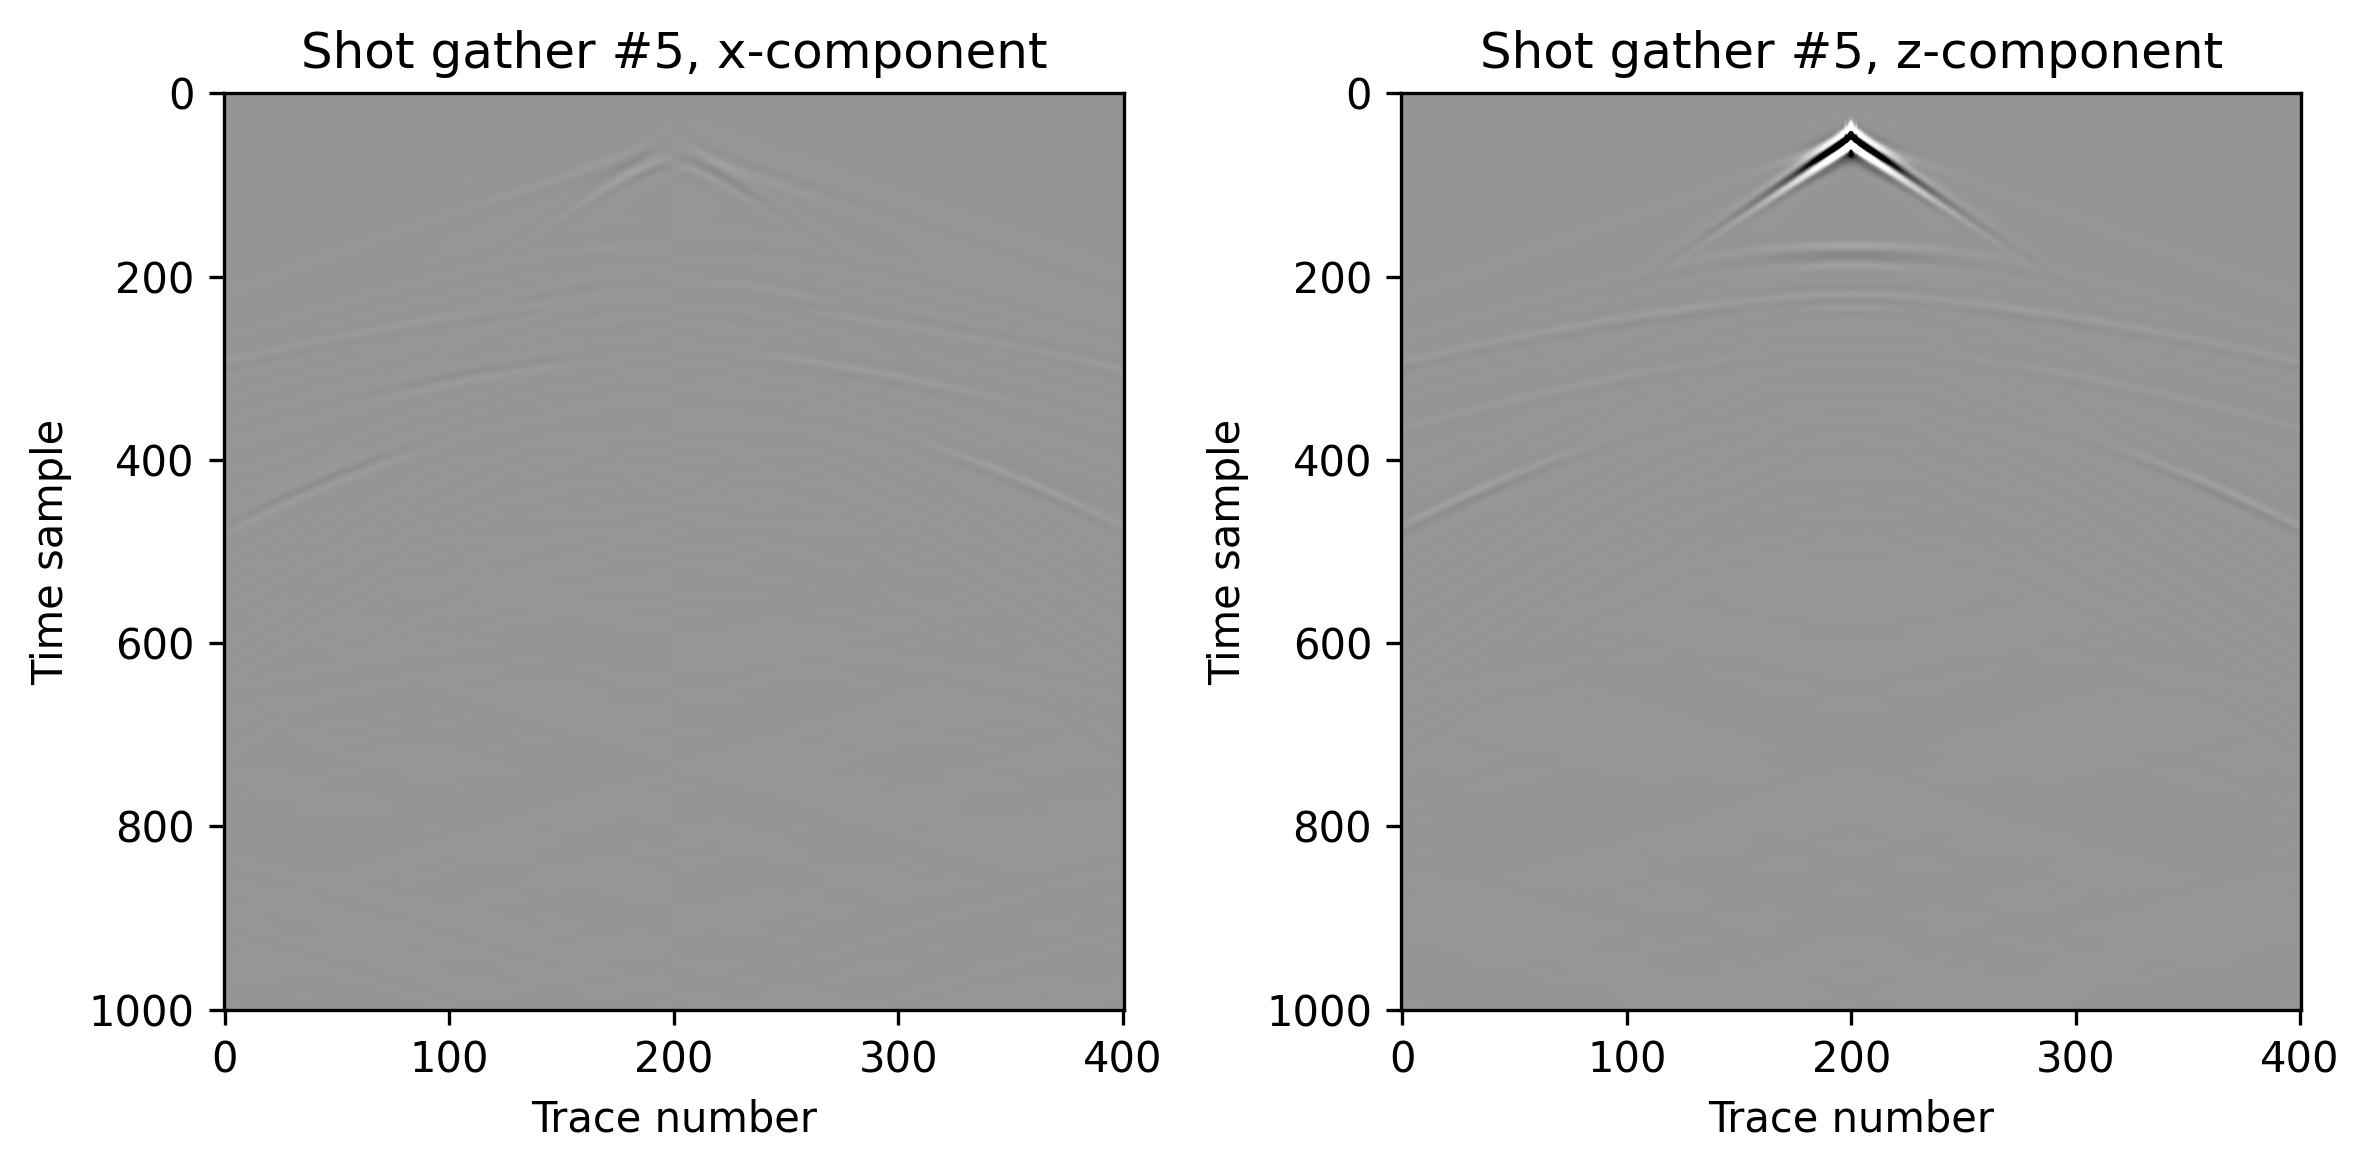

In [8]:
s=5
d=data[:,s,:,:]
vmax=np.amax(d)
p=0.1

plt.figure(figsize=(8,4),dpi=300)
plt.subplot(1,2,1)
plt.imshow(np.transpose(d[0]),interpolation='sinc',aspect="auto",cmap='Greys',vmax=p*vmax,vmin=-p*vmax)
plt.xlabel('Trace number')
plt.ylabel('Time sample')
plt.title("Shot gather #%s, x-component" %s)

plt.subplot(1,2,2)
plt.imshow(np.transpose(d[1]),interpolation='sinc',aspect="auto",cmap='Greys',vmax=p*vmax,vmin=-p*vmax)
plt.xlabel('Trace number')
plt.ylabel('Time sample')
plt.title("Shot gather #%s, z-component" %s)

plt.tight_layout()
plt.show()

In [9]:
# run FWI
!FWI2D.x source=./data/wavelet.H model=./data/model0.H data=./data/data.H output=./data/fwi.H datapath=${PWD}/data/ ioutput=./data/ \
verbose=1 fmax=30 dt=-1 mt=0 fangle=1.5708 seismotype=1 \
ns=10 sx0=2 sz0=0.1 sxinc=0.4 nr=401 rx0=2 rz0=0.1 rxinc=0.01 \
bc_top=2 bc_bottom=2 bc_left=2 bc_right=2 taper_top=50 taper_bottom=50 taper_left=50 taper_right=50 taper_strength=0.08 \
niter=10 max_trial=5


Sun Dec 22 11:30:38 2024


 Subsurface model geometry
xmin=0.00000 km, xmax=8.00000 km, dx=0.01000 km, nx=801
zmin=0.00000 km, zmax=2.00000 km, dz=0.01000 km, nz=201

 Boundary conditions
Top boundary condition = locally absorbing	 taper size = 50	 taper type = cosine squared
Bottom boundary condition = locally absorbing	 taper size = 50	 taper type = cosine squared
Left boundary condition = locally absorbing	 taper size = 50	 taper type = cosine squared
Right boundary condition = locally absorbing	 taper size = 50	 taper type = cosine squared

 Sources' and receivers' geometry
Sources' and receivers' coordinates are read from parameters list
Receivers are point measurement of type particle velocity
Number of sources = 10
Shot 0 located at x=2.00000 km, z=0.10000 km, has 401 receivers
Shot 1 located at x=2.40000 km, z=0.10000 km, has 401 receivers
Shot 2 located at x=2.80000 km, z=0.10000 km, has 401 receivers
Shot 3 located at x=3.20000 km, z=0.10000 km, has 401 receivers
Shot 4 loca

In [10]:
# load FWI model and plot
axes, fwi = sep.read_file(datapath+"fwi.H")
fwi = fwi.reshape(axes.n,order='F').T
print("edata 的维度是:", fwi.shape) # 查看 edata 的维度
print(fwi) # 查看 edata

edata 的维度是: (5, 801, 201)
[[[2.5   2.5   2.5   ... 4.    4.    4.   ]
  [2.5   2.5   2.5   ... 4.    4.    4.   ]
  [2.5   2.5   2.5   ... 4.    4.    4.   ]
  ...
  [2.5   2.5   2.5   ... 4.    4.    4.   ]
  [2.5   2.5   2.5   ... 4.    4.    4.   ]
  [2.5   2.5   2.5   ... 4.    4.    4.   ]]

 [[1.5   1.5   1.5   ... 2.    2.    2.   ]
  [1.5   1.5   1.5   ... 2.    2.    2.   ]
  [1.5   1.5   1.5   ... 2.    2.    2.   ]
  ...
  [1.5   1.5   1.5   ... 2.    2.    2.   ]
  [1.5   1.5   1.5   ... 2.    2.    2.   ]
  [1.5   1.5   1.5   ... 2.    2.    2.   ]]

 [[1.    1.    1.    ... 2.    2.    2.   ]
  [1.    1.    1.    ... 2.    2.    2.   ]
  [1.    1.    1.    ... 2.    2.    2.   ]
  ...
  [1.    1.    1.    ... 2.    2.    2.   ]
  [1.    1.    1.    ... 2.    2.    2.   ]
  [1.    1.    1.    ... 2.    2.    2.   ]]

 [[0.15  0.15  0.15  ... 0.075 0.075 0.075]
  [0.15  0.15  0.15  ... 0.075 0.075 0.075]
  [0.15  0.15  0.15  ... 0.075 0.075 0.075]
  ...
  [0.15  0.15  0.15 

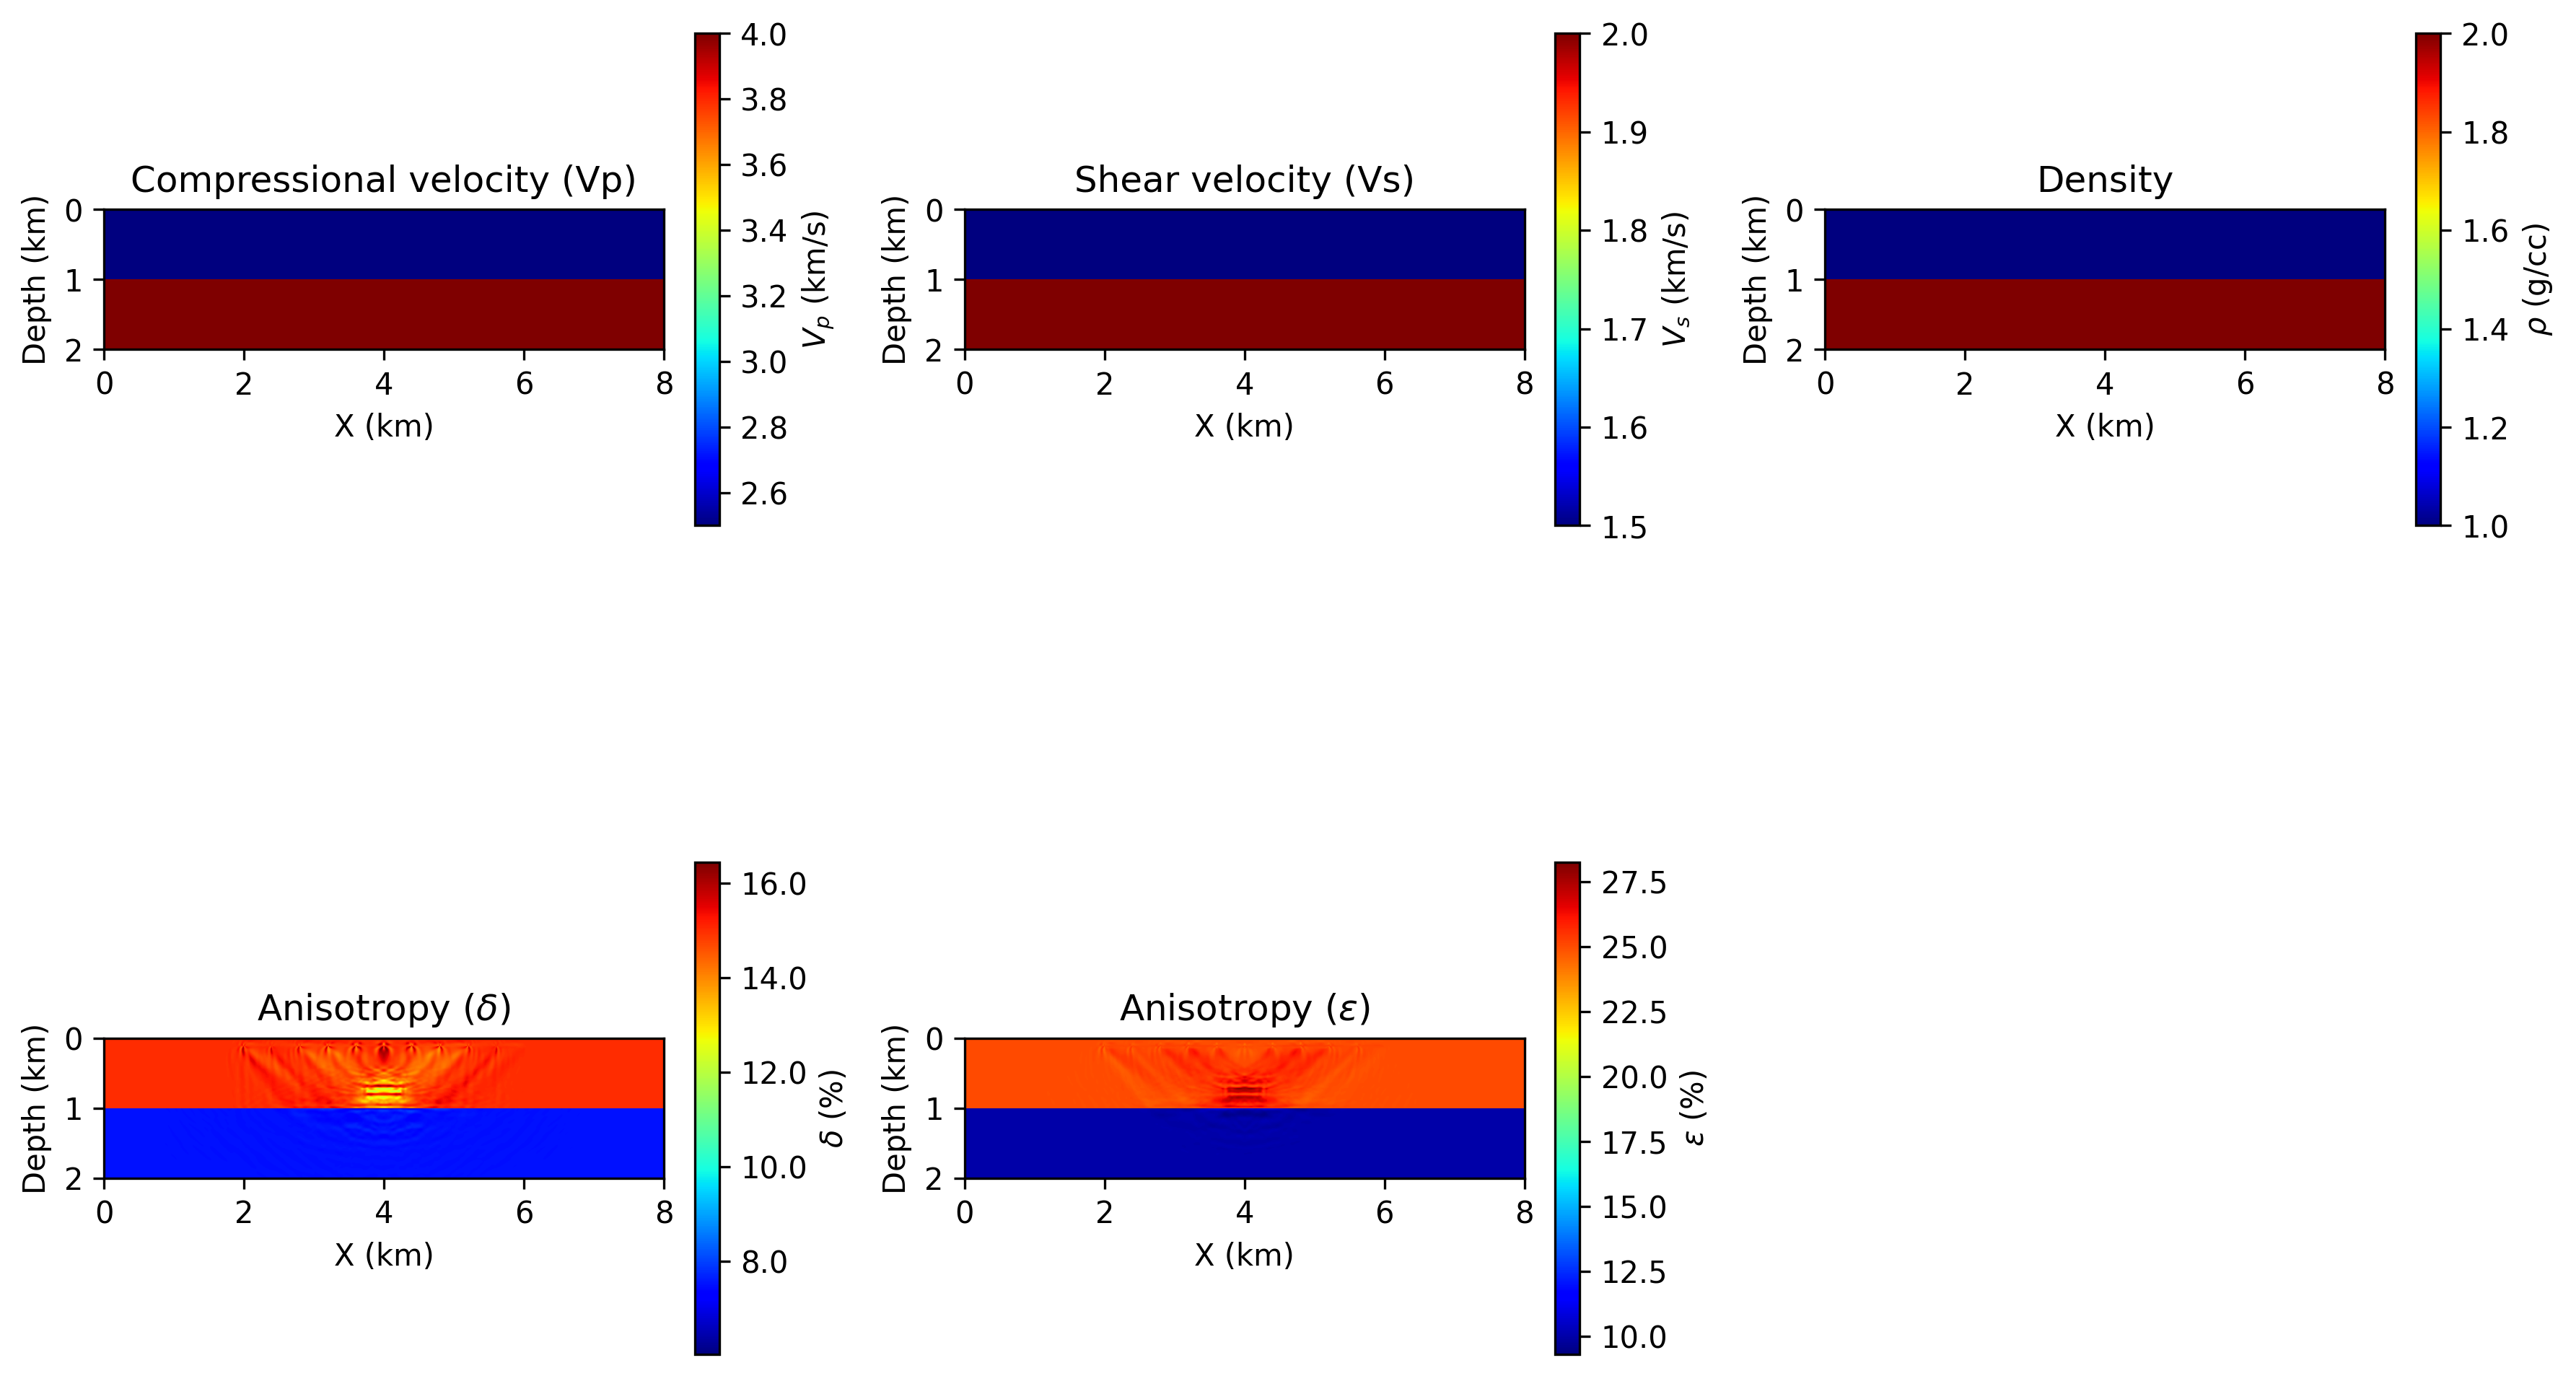

In [11]:
# 绘制 Vp
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,3,1)
plt.imshow(np.transpose(fwi[0,:,:]), interpolation='none', aspect="equal", extent=extent, cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$V_p$ (km/s)')
plt.title("Compressional velocity (Vp)")

# 绘制 Vs
plt.subplot(2,3,2)
plt.imshow(np.transpose(fwi[1,:,:]), interpolation='none', aspect="equal", extent=extent, cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$V_s$ (km/s)')
plt.title("Shear velocity (Vs)")

# 绘制密度
plt.subplot(2,3,3)
plt.imshow(np.transpose(fwi[2,:,:]), interpolation='none', aspect="equal", extent=extent, cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$\rho$ (g/cc)')
plt.title("Density")

# 绘制 Delta
plt.subplot(2,3,4)
plt.imshow(100 * np.transpose(fwi[3,:,:]), interpolation='none', aspect="equal", extent=extent, cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$\delta$ (%)')
plt.title(r'Anisotropy ($\delta$)')

# 绘制 Epsilon
plt.subplot(2,3,5)
plt.imshow(100 * np.transpose(fwi[4,:,:]), interpolation='none', aspect="equal", extent=extent, cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$\epsilon$ (%)')
plt.title(r'Anisotropy ($\epsilon$)')

plt.tight_layout()

In [14]:
# load gradient model and plot
axes, grad = sep.read_file(datapath+"gradient_iter_6.H")
print("grad 的维度是:",grad.shape) # 查看 edata2 的维度
grad = grad.reshape(axes.n,order='F').T
print("grad 的维度是:",grad.shape) # 查看 edata2 的维度
print(grad)

grad 的维度是: (805005,)
grad 的维度是: (5, 801, 201)
[[[-7.25966379e-12 -2.28852822e-11 -1.09378062e-11 ...  2.87845685e-11
    4.26355236e-11  1.20352808e-11]
  [-2.53595946e-11 -5.93567209e-11 -1.21376589e-11 ...  5.14594443e-11
    1.11315297e-10  3.75474409e-11]
  [-1.53770347e-11 -2.03940649e-11  1.25233227e-11 ... -9.69564793e-12
    3.25734335e-11  1.78549762e-11]
  ...
  [-9.18509713e-12 -4.21493188e-11 -3.58915293e-11 ... -1.51735208e-10
   -1.68409786e-10 -3.73329111e-11]
  [-7.50450049e-12 -4.52275023e-11 -4.52627276e-11 ... -1.57143507e-10
   -1.58214192e-10 -2.90812756e-11]
  [-4.77106961e-13 -7.93909122e-12 -1.05126064e-11 ... -2.85893757e-11
   -2.40834644e-11 -2.71247174e-12]]

 [[-2.10383967e-12 -8.76022605e-12 -7.74337192e-12 ...  2.52773531e-11
    3.39611429e-11  9.28870349e-12]
  [-7.23272137e-12 -2.86930583e-11 -2.44665798e-11 ...  8.09712297e-11
    1.16615245e-10  3.46687401e-11]
  [-3.82040276e-12 -1.79084039e-11 -1.61394665e-11 ...  5.24006567e-11
    8.00617558e-11 

Clean up the data directory

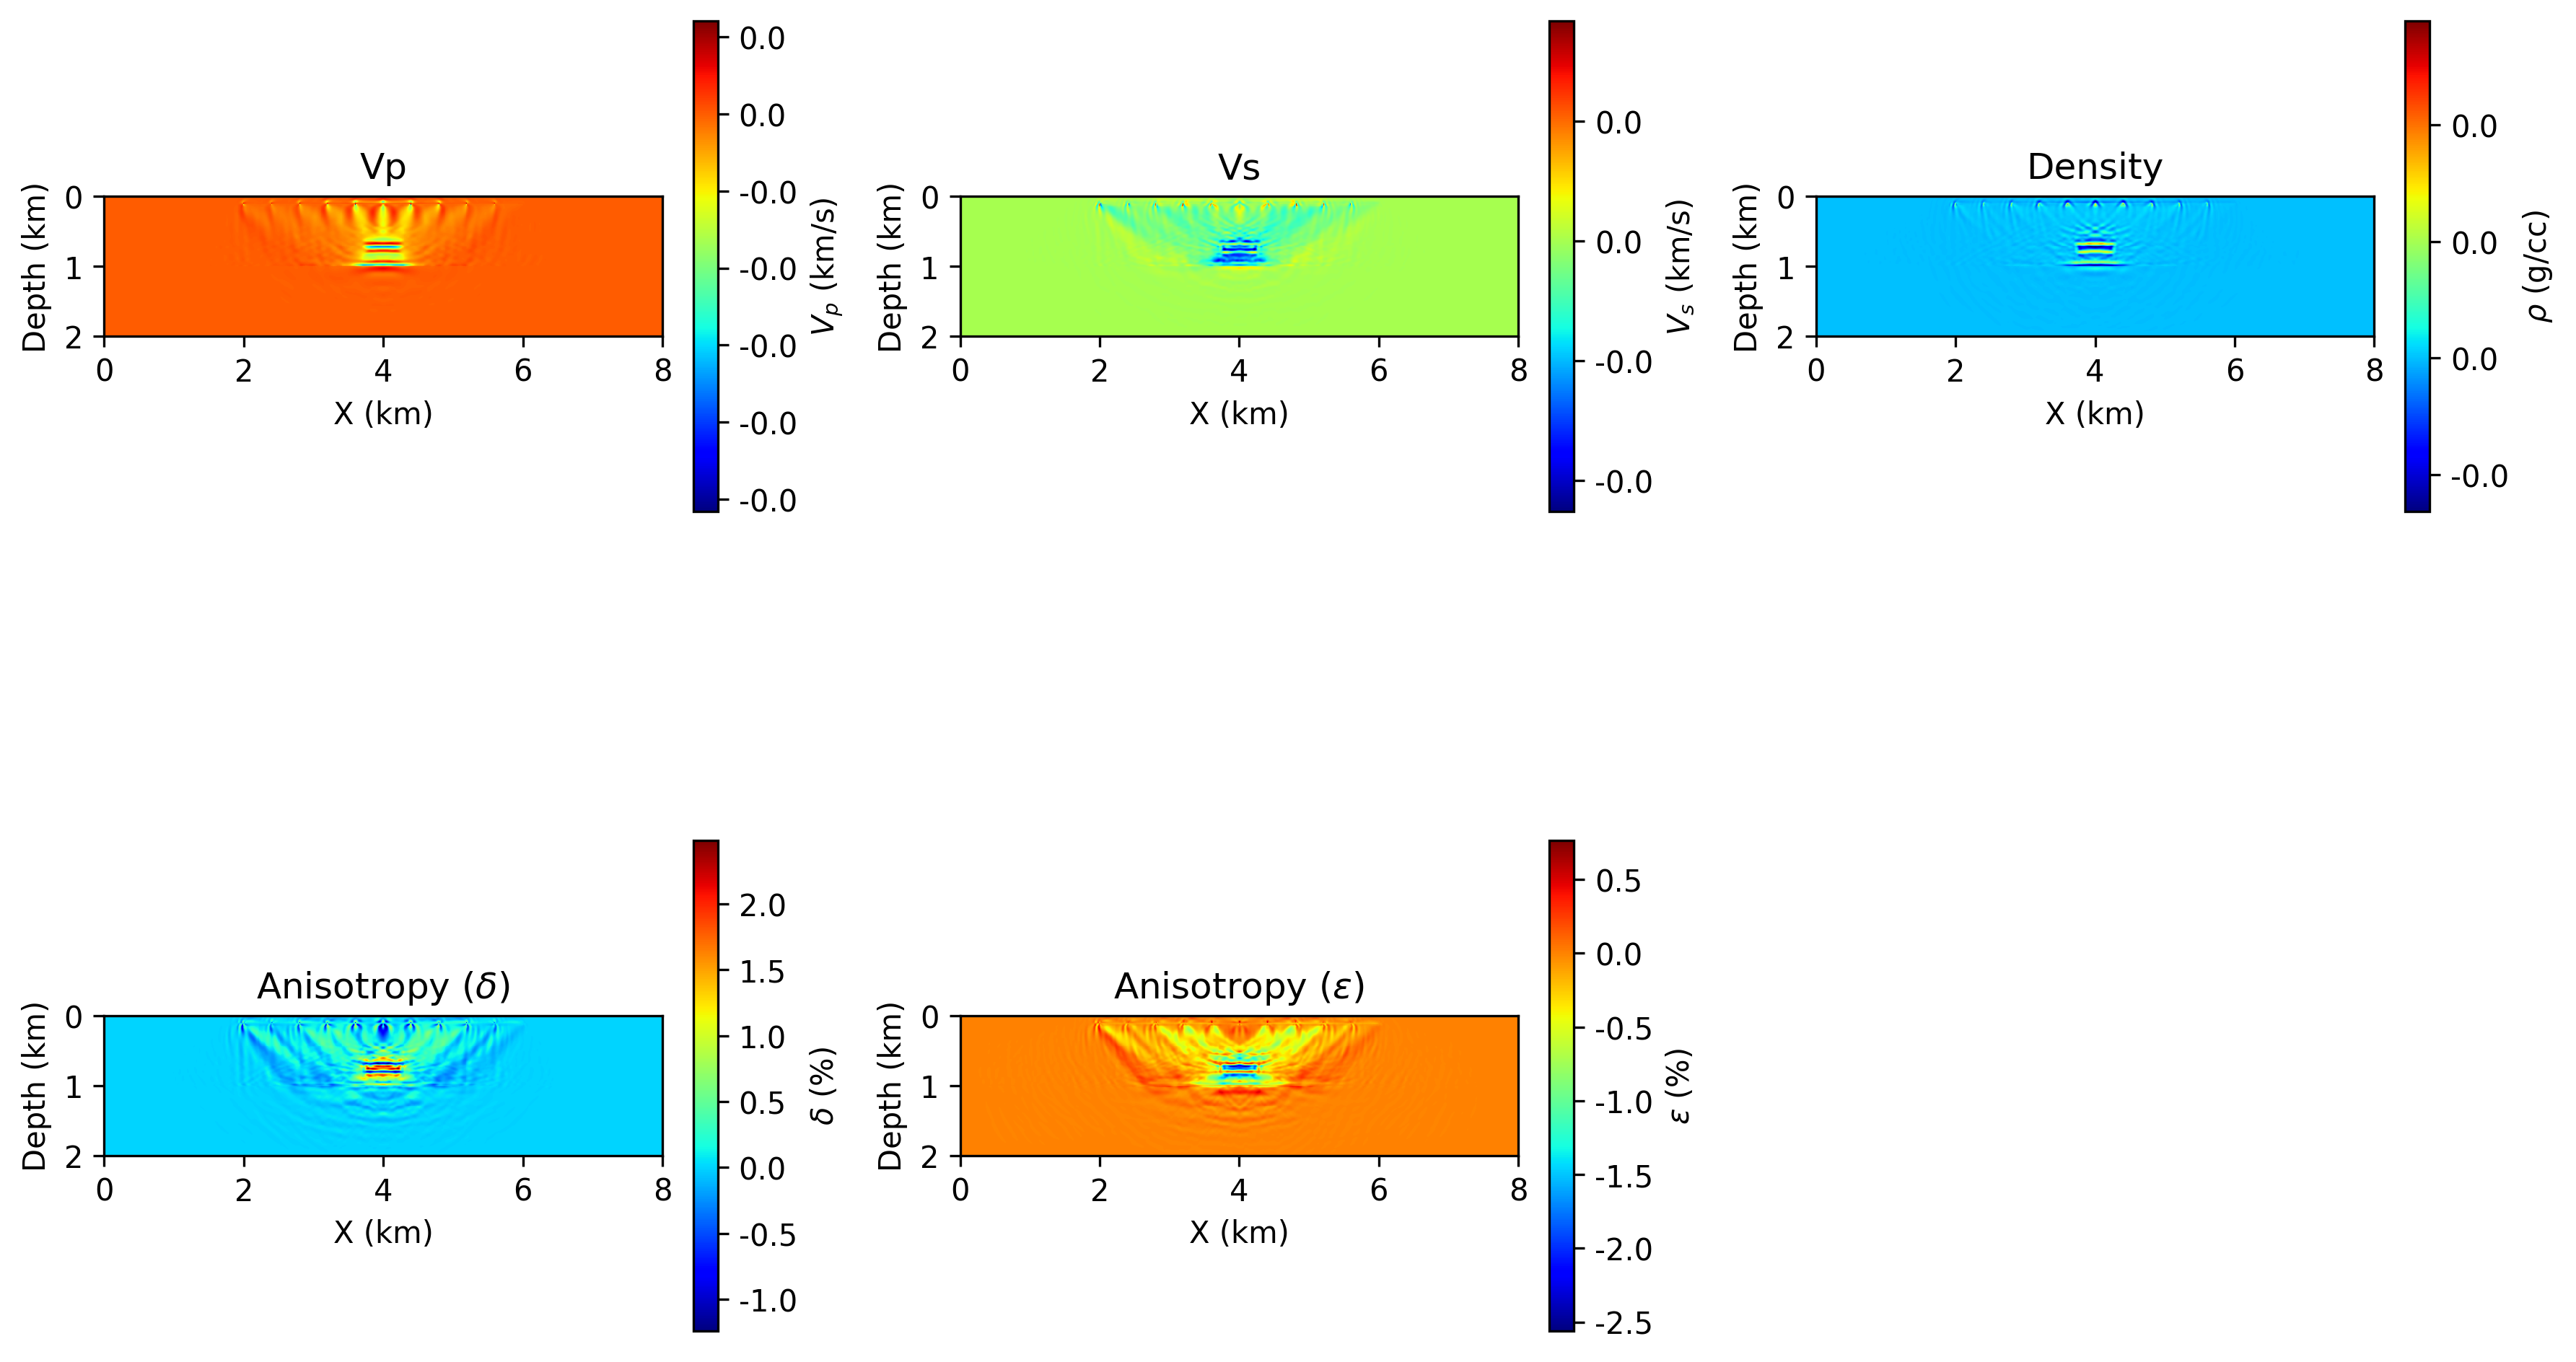

In [15]:
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,3,1)
plt.imshow(np.transpose(grad[0,:,:]),interpolation='none',aspect="equal",extent=extent,cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f',label=r'$V_p$ (km/s)')
plt.title("Vp")

plt.subplot(2,3,2)
plt.imshow(np.transpose(grad[1,:,:]),interpolation='none',aspect="equal",extent=extent,cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f',label=r'$V_s$ (km/s)')
plt.title("Vs")

plt.subplot(2,3,3)
plt.imshow(np.transpose(grad[2,:,:]),interpolation='none',aspect="equal",extent=extent,cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f',label=r'$\rho$ (g/cc)')
plt.title("Density")

plt.subplot(2,3,4)
plt.imshow(np.transpose(grad[3,:,:]),interpolation='none',aspect="equal",extent=extent,cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$\delta$ (%)')
plt.title(r'Anisotropy ($\delta$)')

plt.subplot(2,3,5)
plt.imshow(np.transpose(grad[4,:,:]),interpolation='none',aspect="equal",extent=extent,cmap='jet')
plt.xlabel('X (km)')
plt.ylabel('Depth (km)')
plt.colorbar(fraction=0.04, format='%.'+str(1)+'f', label=r'$\epsilon$ (%)')
plt.title(r'Anisotropy ($\epsilon$)')

plt.tight_layout()

In [11]:
!rm -rf data